In [1]:
from sklearn.preprocessing import LabelEncoder
from natsort import natsorted
import xml.etree.ElementTree as elemtree
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import re

In [2]:
p = re.compile("[.][x][m][l]")

In [3]:
xml_file_list = list()
for file_name in os.listdir("ingredients/"):
    if p.search(file_name):
        xml_file_list.append(file_name)
xml_file_list = natsorted(xml_file_list)
print(len(xml_file_list), type(xml_file_list))

186 <class 'list'>


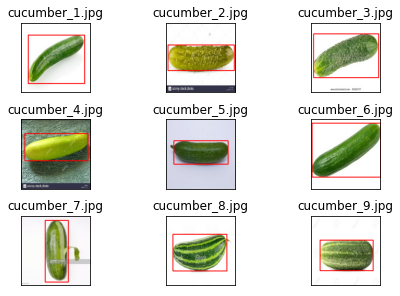

In [4]:
f, axs = plt.subplots(3, 3, constrained_layout=True)
row, col = 0, 0
for xml_file_name in xml_file_list[:9]:
    tree = elemtree.parse(f"ingredients/{xml_file_name}")
    root = tree.getroot()

    loc = list()
    for data in root[6][4]:
        loc.append(int(data.text))
        
    img = cv2.imread(f"ingredients/{os.path.splitext(xml_file_name)[0]}.jpg")
    img = cv2.rectangle(img, loc[0:2], loc[2:4], (0, 0, 255), 2)
    axs[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[row, col].set_xticks([])
    axs[row, col].set_yticks([])
    axs[row, col].set_title(f"{os.path.splitext(xml_file_name)[0]}.jpg")

    col += 1
    if col >= 3:
        row += 1
        col = 0        

In [5]:
locs = list()
labels = list()
for xml_file_name in xml_file_list:
    tree = elemtree.parse(f"ingredients/{xml_file_name}")
    root = tree.getroot()
    
    loc = list()
    for data in root[6][4]:
        loc.append(int(data.text))
    locs.append(loc)
    labels.append(root[6][0].text)
le = LabelEncoder()
digit_labels = le.fit_transform(labels)
print(np.shape(digit_labels))
print(np.shape(labels))
print(np.shape(locs))

(186,)
(186,)
(186, 4)
